# Analysis of NYPD Civilian Complaints

## Summary of Findings

### Missingness of Complainant Gender

#### Introduction
The data set to examine is a compilation of info about civilian complaints from 1985 to 2020 including info from officer age, gender, ethnicity to complainant age, gender, ethnicity, time the complaint was received and open, specific allegations, and whether or not the complaint was successful.

This study will examine the missingness of complainant gender values and their dependency on other values like officer ethnicity and officer gender. Then, investigate if complaints from women are more successful than men for the same allegations.

#### Cleaning and EDA
It was observed that some missing values were encoded with "Unknown", so they were replaced with NaNs to avoid counting those entries when aggregating the data and to make the data more tidy in having a consistent representation for missing values. Afterwards, there were negative values seen for complainant ages, and since one can reason that no negative age value can exist, these were replaced with NaNs as well. In order to facilitate easier data manipulation when investigating the question of whether or not complaints from women are more successful than men for the same allegations, a "substantiated" column was created indicating "True" for if the outcome of the complaint was successful and "False" otherwise. This is because of the fact that the board disposition includes whether or not the complaint was substantiated *and* an additional outcome added if the complaint was substantiated.

Then, the percentages of complainant gender were examined. Through computing the proportions of the complainant genders, it was found that 82.50% of the complainants were male, while 17.22% of them were female. Because of these disproportionate counts, further analysis on the complainant gender may be inaccurate because it would mean the data for a single female individual affects the female aggregate more than a single male individual for the male aggregate.

After, the distribution of complainant gender dependent on officer gender was examined. According to the conditional distribution, 60.88% of the people who complained to a female officer were male whereas 38.75% were female. On the other hand, 83.75% of the people who complained to a male officer were male while 15.97% were female. These results reveal that it is most likely for a complainant to be male regardless of the officer's gender, and this bias towards male complainants may affect further analysis of complainant gender since a potential association between complainant gender and officer gender can confound analysis.

#### Assessment of Missingness
First, missingness of complainant gender on officer ethnicity was examined through a pivot table and a bar graph of relative frequencies. According to the displays, the amount of missingness for complainant gender appears relatively equal across officer ethnicities. The same conclusion is reached for complainant gender dependency on officer gender. 

However, to further quantitatively investigate the dependencies and verify these results, permutation tests were performed in which it was assumed that the missingness of complainant gender across the categories should be equal. Using this assumption, the total consecutive difference was calculated for the observed data and for data in which the complainant gender column is shuffled in order to find a p-value to quantify the dependency of the complainant gender missingness on officer ethnicity and on officer gender. For each permutation test, a significance level of 0.01 was fixed, and 1,000 simulations would be run. The null hypothesis to assume under each is that the missingness of the complainant gender column is equal across the categories of officer ethnicity or officer gender. Thus, it follows that the alternative hypothesis is that the missingness of complainant gender is dependent on the column being examined. 

Consequently, for testing complainant gender missingness dependent on officer ethnicity, a p-value of 0.068 was found, and since it is greater than the significance level, it means we cannot reject the null hypothesis, implying that the missingness of the complainant gender is not dependent on officer ethnicity. However, the p-value of 0.068 is still relatively low, as it reveals that the probability of observing a test statistic as extreme as the observed value under the null hypothesis is 6.8%, so there is still reason to believe that the missingness of complainant gender is very loosely associated with officer ethnicity.

As for investigating complainant gender missingness dependency on officer gender, a p-value of 0.0 was found, and since it is less than the significance level, it means we can reject the null hypothesis, implying that the missingness of the complainant gender is dependent on officer gender. Because the p-value was 0.0, it means that there is a 0.00% chance of seeing a value as extreme as the observed value under the null hypothesis. With this, one can be substantially confident that the missingness of complainant gender is dependent on officer gender.

#### Hypothesis Test
Null hypothesis: complaints of women are not any more successful than men for the same allegations.

Alternative hypothesis: complaints of women are more successful than men for the same allegations.

Significance level: 0.01

Test statistic: total difference of women complaint substantiation rates subtracted by men complaint substantiation rates

The question in the investigation is whether or not complaints of women are more successful than men for the same allegations, so the null hypothesis would assume the opposite, meaning that complaint substantiation for women is relatively less than or equal to complaint substantiation for men within the same allegations. Naturally, the alternative hypothesis would be the finding stated in the question: complaints of women are more successful than men for the same allegations. A significance level of 0.01 was chosen to be conservative in making conclusions through minimizing the probability of rejecting the null hypothesis when it is true. Since the rates of complaint substantiation are partitioned into categories: allegations, the distribution of complaint success rates is categorical. In order to compare the differences between the male and female complaint success rates, the success rates for males were subtracted from the success rates for females within each allegation type, then summed up. It is alike finding the Total Variation Distance, but since the alternative hypothesis implies that extreme values would occur when the total female substantiation rates are greater than the total male substantiation rates, it follows that the test statistic should be computed by female substantiation rates - male substantiation rates. Positive values indicate that overall, complaints by women are more successful than men for the same allegations. Values close to or equal to 0 indicate that overall, complaints by women are about equal in substantion rates with those of men. Negative values would indicate that overall, complaints by men are more successful than women for the same allegations. Precisely for these reasons, an absolute value in finding the difference between substantion rates was left out. There was only one extreme of the random distribution of the test statistic: positively high values, so the test only focused on one tail of the distribution, towards the positive end.

The resulting p-value was 1.0, meaning the probability of observing a value at least as extreme (in the context of the test) was 100%. As a result of this and the fact that 1.0 is greater than the significance level, one fails to reject the null hypothesis with great confidence, meaning that complaints by women are not more successful than complaints by men for the same allegations.

### Officer Ethnicity Prediction

#### Introduction
This data investigation creates a model to predict the ethnicity of an officer, given complaint data. Since the target feature is categorical, the problem here is classification. The evaluation metric chosen is prediction accuracy since it represents the performance of the model as the proportion of correctly predicted classifications.

#### Baseline Model
The baseline model has 21 total features: 8 quantitative, 0 ordinal, and 8 nominal. 

The resulting prediction accuracy for the training set was 1.0 while the test set gave a score of 0.967. Thus, training set yielded a perfect score with the test set giving a close to perfect score. At the same time, it could be a bad sign that the training score was 1.0 since it seems suspiciously high as a possible indication of overfitting, though the test set score is not drastically lower.

#### Final Model
Two new types of engineered features were added, totalling to four new features (since there are two year and two age features): age categorized into young and old and year binarized with a threshold of 1993. 

The age feature engineering should improve the model because young and old people may treat the same person differently, and if both officer and complainant ages are included, there could be a possible tendency for older people to file complaints about younger people. The decision to binarize years with a threshold of 1993 was chosen specifically because it marks the beginning of Bill Clinton's presidency in which numerous policy changes were made to the law enforcement and criminal justice systems. Hence, 1993 could be an important year for shifts in how (potential) law offenders are treated.

The model chosen was a decision tree classifier with best parameters `max_depth = None`, `min_samples_leaf = 2`, and `min_samples_split = 5` as opted for by a grid search CV test.

#### Fairness Evaluation
To check fairness of the model, the "interesting subset" was constructed off of `complainant_ethnicity` to explore whether the model is fairer for White or non-White complainants. The subset was binarized into complainants who were White and those who were not White. The chosen parity measure was accuracy rate.
- Null Hypothesis: the model is fair; the accuracy rate for the White complainant subset is not higher than that of the non-White complainant subset.
- Alternative Hypothesis: the model is unfair; the accuracy rate for the White complainant subset is higher than that of the non-White complainant subset.

The difference between the accuracy rate for White complainants and non-White complainants was used as the test statistic. Since it is White complainant accuracy subtracted by non-White complainant accuracy, high values are considered extreme because it would indicate that White complainaint accuracy is higher whereas values close to 0 and negative would point towards the null hypothesis.

A significance level of 0.01 was fixed, and 1000 simulations were run.

As a result of the permutation test, a p-value of 0.972 was obtained, and since 0.972 is greater than the significance level of 0.01, one fails to reject the null hypothesis with convincing evidence that the model does not predict more accurately for White complainants than for non-White complainants.

*Note that random seeds were used when initializing the decision tree classifier and also for shuffling data in random simulations to ensure reproducibility of results.*

## Code

### Missingness of Complainant Gender

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

#### Cleaning and EDA

In [2]:
# read in the .csv file into a dataframe
data = pd.read_csv("allegations.csv")
# show the first 5 rows of the data
data.head(5)

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


This code properly replaces "Unknown"s with NaNs to make the data more tidy.
Also, it is unreasonable to observe a negative complainant's age, since age can only be a nonzero value, so complainant ages that are negative were replaced with NaNs.
A new column called "substantiated" was added recording whether or not the complaint was substantiated to make analyzing complaint substantiation dependency on gender simpler.

In [3]:
# replace "Unknown"s with NaNs
data = data.replace("Unknown", np.NaN)
# replace negative complainant ages with NaNs
data["complainant_age_incident"] = \
    data["complainant_age_incident"].mask(data["complainant_age_incident"] < 0, np.NaN)
# create a new column to record whether or not the complaint was substantiated
data["substantiated"] = data["board_disposition"].str.contains("Substantiated")
# show the first 5 rows of the data
data.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition,substantiated
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions),True
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),True
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges),True
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges),True
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A),True


This code is a univariate analysis of the complainant gender column.

Female Complainants: 0.17217021568425744
Male Complainants: 0.8249494222130782


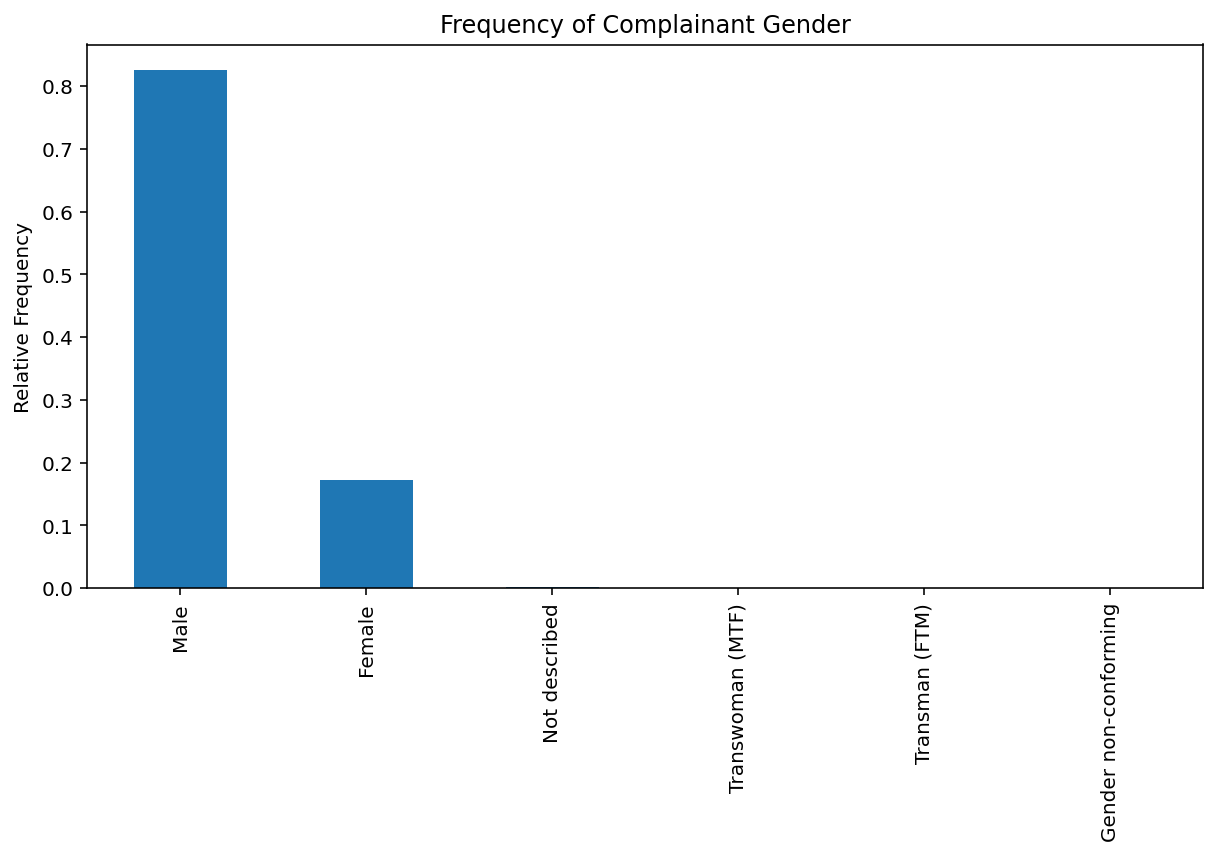

In [4]:
# set a title for the graph
title = "Frequency of Complainant Gender"
# set a y-label for the graph
ylabel = "Relative Frequency"
# graph the frequencies of complainant gender
gender_frequency = data["complainant_gender"].value_counts(normalize = True)
gender_frequency.plot(kind = "bar", 
                      title = title,
                      ylabel = ylabel,
                      figsize = (10, 5))
# print the male and female frequencies
print("Female Complainants: " + str(gender_frequency["Female"]))
print("Male Complainants: " + str(gender_frequency["Male"]))

This code is a bivariate analysis of complainant gender and officer gender. The pivot table shows percentages of officers with complaints against them separated by their gender and the gender of the complainant.

In [5]:
# pivot the data by complainant gender dependent on officer gender
genders = data.pivot_table(index = "mos_gender", 
                           columns = "complainant_gender", 
                           aggfunc = "size")
# compute the proportions
genders = genders.apply(lambda x:x/x.sum(), axis = 1).fillna(0)
# display the pivot table
genders

complainant_gender,Female,Gender non-conforming,Male,Not described,Transman (FTM),Transwoman (MTF)
mos_gender,,,,,,
F,0.387461,0.000000,0.608777,0.001881,0.001881,0.000000
M,0.159714,0.000073,0.837456,0.001959,0.000073,0.000725


#### Assessment of Missingness

This code creates a function to help simplify work of creating pivot tables to show conditional distributions, specifically for missingness values.

In [6]:
# function that takes a dataframe, column to examine missingness for, and column to check
# missingness dependency for as input, and returns data pivoted by the given arguments
def pivot_missingness(df, missing, dependent):
    # create a copy of the dataframe
    data = df.copy()
    # construct the name of the column for recording missingness of the given column
    missing_column = missing + "_null"
    # add the column to the data
    data[missing_column] = pd.isnull(data[missing])
    # pivot the data by missingness dependent on the given column to check
    pivot = data.pivot_table(index = dependent, 
                             columns = missing_column, 
                             aggfunc = "size").fillna(0)
    # compute the proportions
    pivot = pivot.apply(lambda x:x/x.sum(), axis = 1)
    # return this pivot table
    return pivot

This section displays a pivot table showing the missingness of complainant gender dependent on officer ethnicity.

In [7]:
# argument: "complainant_gender" as the column with missing values
missing = "complainant_gender"
# argument: "mos_ethnicity" to see if complainant gender missingness is dependent on 
# officer gender
dependent = "mos_ethnicity"
# create a pivot table using the function and previously declared arguments
gender_ethnicity_missingness = pivot_missingness(data, missing, dependent)
# display the pivot table
gender_ethnicity_missingness

complainant_gender_null,False,True
mos_ethnicity,,
American Indian,0.937500,0.062500
Asian,0.903226,0.096774
Black,0.884444,0.115556
Hispanic,0.905683,0.094317
White,0.853547,0.146453


This code block displays a bar graph comparing the amount of missingness of the complainant gender column within officer ethnicity.

<AxesSubplot:title={'center':'Missingness of Complainant Gender Dependent on Officer Ethnicity'}, xlabel='Officer Ethnicity', ylabel='Relative Frequency'>

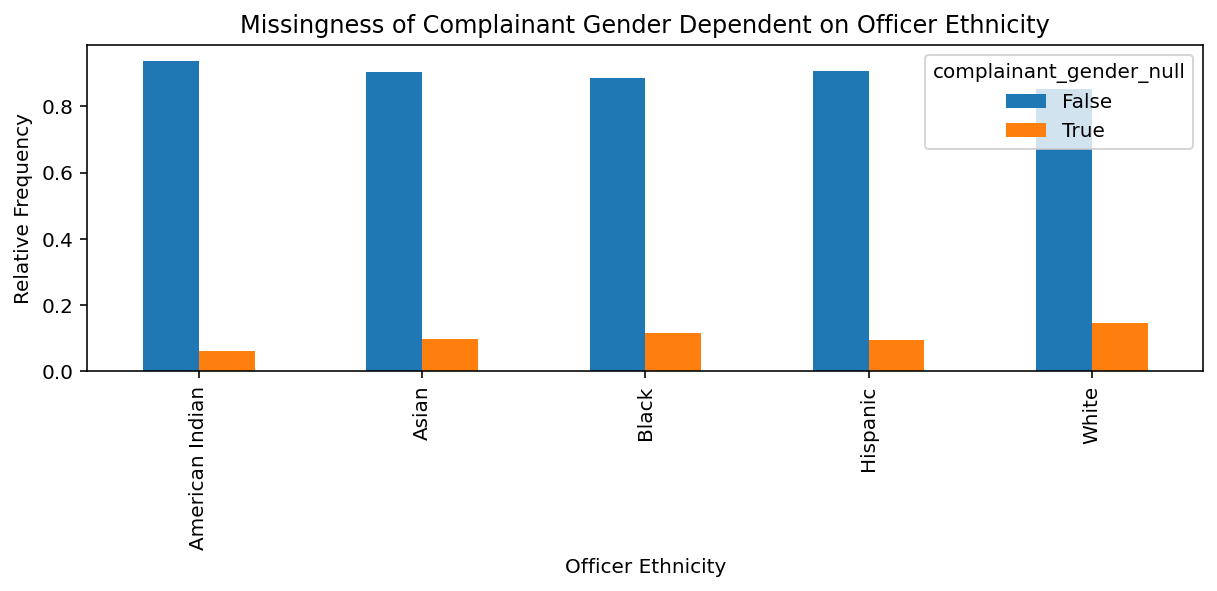

In [8]:
# set a title for the graph
title = "Missingness of Complainant Gender Dependent on Officer Ethnicity"
# graph the frequencies of missingness of complainant gender dependent on officer
# ethnicity
gender_ethnicity_missingness.plot(kind = "bar", 
                                  title = title, 
                                  xlabel = "Officer Ethnicity", 
                                  ylabel = "Relative Frequency", 
                                  figsize = (10, 3))

This section displays a pivot table for the conditional distribution of complainant gender missingness dependent on the officer's gender.

In [9]:
# argument: "complainant_gender" as the column with missing values
missing = "complainant_gender"
# argument: "mos_gender" to see if complainant gender missingness is dependent on officer
# gender
dependent = "mos_gender"
# create a pivot table using the function and previously declared arguments
gender_missingness = pivot_missingness(data, missing, dependent)
# display the pivot table
gender_missingness

complainant_gender_null,False,True
mos_gender,,
F,0.90625,0.09375
M,0.87246,0.12754


This section plots a bar graph comparing the amount of missingness of complainant gender values within officer gender.

<AxesSubplot:title={'center':'Missingness of Complainant Gender Dependent on Officer Gender'}, xlabel='Officer Gender', ylabel='Relative Frequency'>

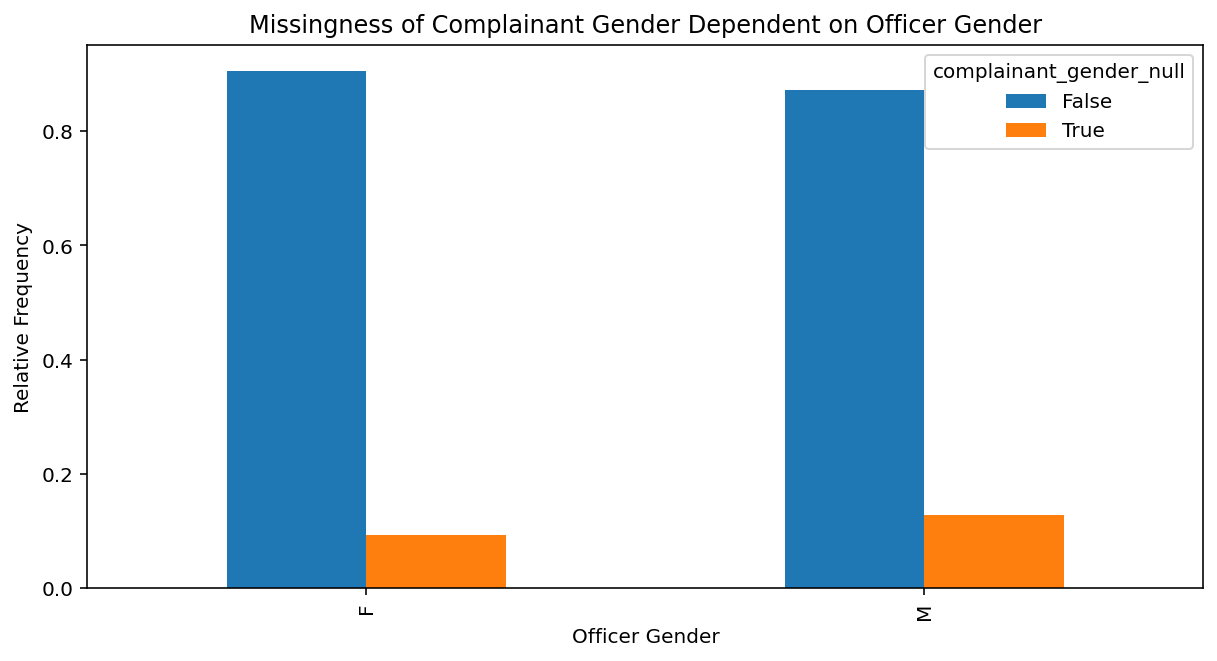

In [10]:
# set a title for the graph
title = "Missingness of Complainant Gender Dependent on Officer Gender"
# graph the frequencies of missingness of complainant gender dependent on officer gender
gender_missingness.plot(kind = "bar", 
                        title = title, 
                        xlabel = "Officer Gender", 
                        ylabel = "Relative Frequency", 
                        figsize = (10, 5))

These functions were created to help simplify tedious work in performing a permutation test for assessing missingness of a column possibly dependent on another column.

In [11]:
# function that takes a pivot table as input and returns the total consecutive difference
# of the missingness
def difference_missingness(pivot):
    # compute the statistic
    statistic = abs(pivot.diff())[True].sum()
    # return the statistic
    return statistic

# function that takes in a dataframe, column with missing values to examine, column that
# the column with missing values is possibly dependent on, and an integer n to run n
# number of simulations with, prints the resulting observed value, p-value, and plots
# a histogram of the random distribution of the test statistic
def simulations_missingness(df, missing, dependent, n):
    # create a pivot table using the function parameters
    pivot = pivot_missingness(df, missing, dependent)
    # find the observed test statistic
    observation = difference_missingness(pivot)
    # create an array of zeros with length n to record simulation test statistics with
    statistics = np.zeros(n)
    # run n simulations
    for i in range(n):
        # create a copy of the data
        simulation = df.copy()
        # shuffle the column the missing values may be dependent on
        simulation[dependent] = df.sample(frac = 1, random_state = i).reset_index()[dependent]
        # pivot the shuffled data
        simulation_pivot = pivot_missingness(simulation, missing, dependent)
        # compute the test statistic for this simulation
        statistic = difference_missingness(simulation_pivot)
        # record the test statistic in the array
        statistics[i] = statistic
    # convert the array to a series
    results = pd.Series(statistics)
    # find the p-value of the test
    p_value = (results >= observation).mean()
    # modify the column names to be more readable
    missing_title = missing.replace('_', ' ').title()
    dependent_title = dependent.replace("mos", "officer")
    dependent_title = dependent_title.replace('_', ' ').title()
    # set a title for the graph
    title = "Random Distribution of Total Consecutive Difference Between Missingness"
    title += " of " + missing_title + " Dependent On " + dependent_title
    # plot a histogram of the random distribution of test statistics under the null
    # hypothesis
    results.plot(kind = "hist", 
                title = title, 
                figsize = (10, 5))
    # return the observation and p-value
    return observation, p_value

This section performs a permutation test, running 1,000 simulations and calculating the total consecutive difference to assess whether or not the missingness of complainant gender is dependent on officer ethnicity.

observed value: 0.12643250561836228
p-value: 0.068
reject null hypothesis: False


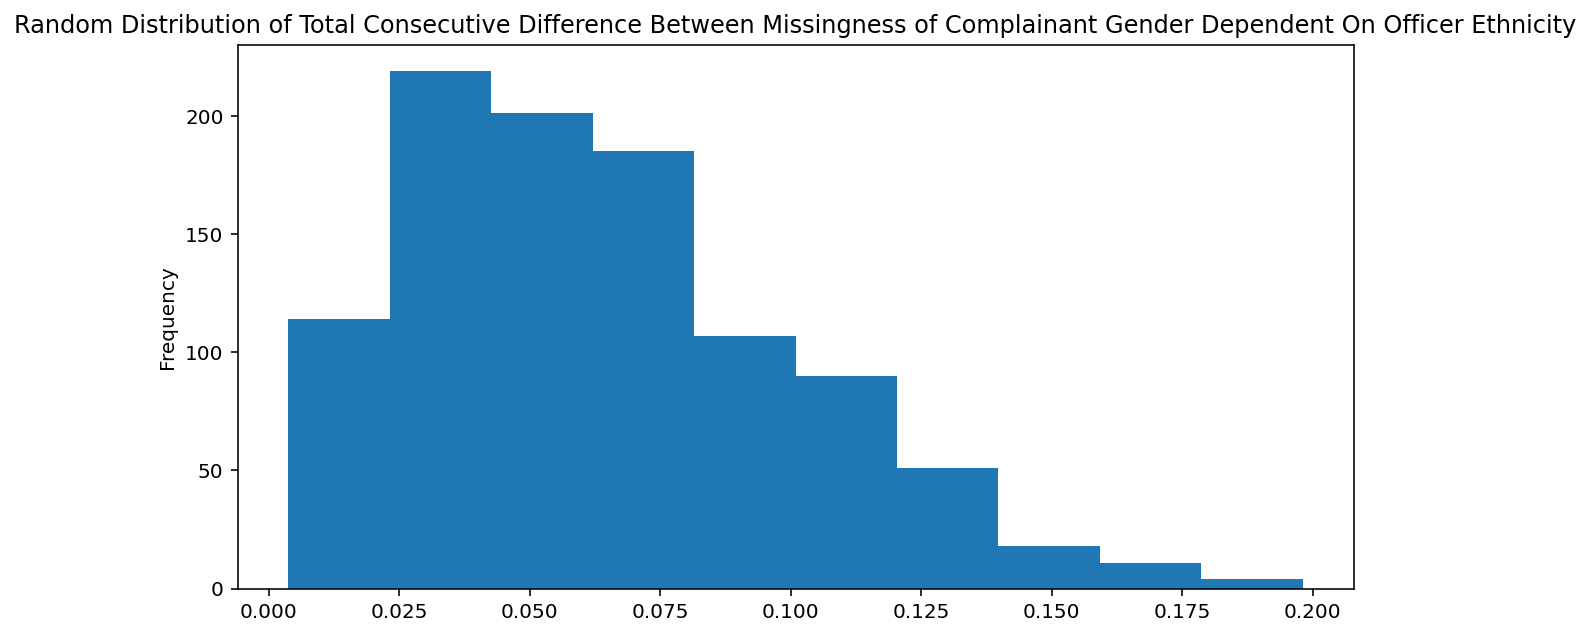

In [12]:
# fix a significance level of 0.01
significance = 0.01
# set simulation count to 1,000
n = 1_000
# argument: "complainant_gender" as the column with missing values
missing = "complainant_gender"
# argument: "mos_ethnicity" as the column the missing values may be dependent on
dependent = "mos_ethnicity"
# obtain the observed value and p-value from running 1,000 simulations
observation, p_value = simulations_missingness(data, missing, dependent, n)
# create a boolean to record whether or not to reject the null hypothesis
reject_null = (p_value < significance)
# print the results
print("observed value: " + str(observation))
print("p-value: " + str(p_value))
print("reject null hypothesis: " + str(reject_null))

This section performs another permutation test, running 1,000 simulations and calculating the total consecutive difference to assess whether or not the missingness of complainant gender is dependent on officer gender.

observed value: 0.03378971770365213
p-value: 0.0
reject null hypothesis: True


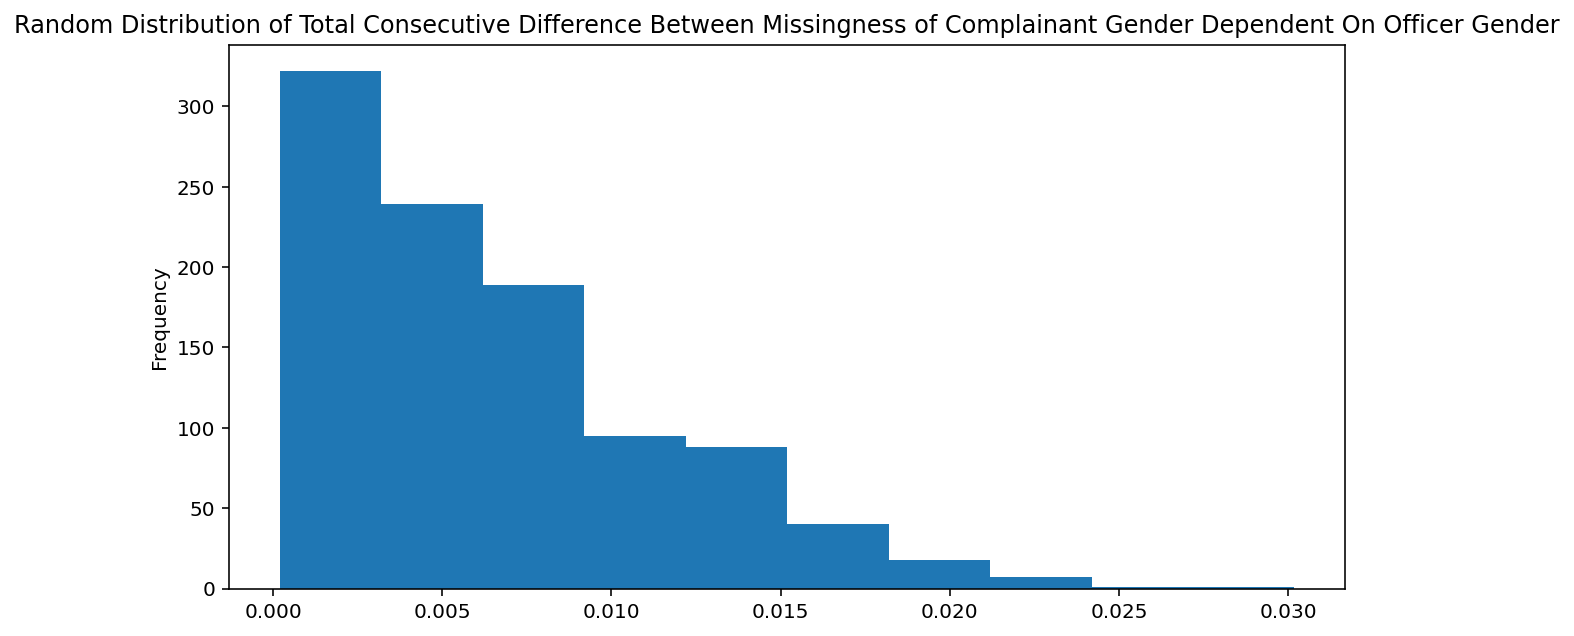

In [13]:
# fix a significance level of 0.01
significance = 0.01
# set simulation count to 1,000
n = 1_000
# argument: "complainant_gender" as the column with missing values
missing = "complainant_gender"
# argument: "mos_gender" as the column the missing values may be dependent on
dependent = "mos_gender"
# obtain the observed value and p-value from running 1,000 simulations
observation, p_value = simulations_missingness(data, missing, dependent, n)
# create a boolean to record whether or not to reject the null hypothesis
reject_null = (p_value < significance)
# print the results
print("observed value: " + str(observation))
print("p-value: " + str(p_value))
print("reject null hypothesis: " + str(reject_null))

#### Hypothesis Test

Similar to functions above, these functions help simplify tedious work to perform the permutation test and answer whether or not women find more success in their complaints compared to men.

In [14]:
# function that takes in a dataframe as input and returns a pivot table pivoted by
# the genders male and female, and whether or not the complaint was substantiated along
# with the specified allegation
def pivot_gender(data):
    # record the genders that are not "Male" and "Female" as a filter for later
    gender_filter = data[(data["complainant_gender"] != "Male") 
                         & (data["complainant_gender"] != "Female")]
    gender_filter = gender_filter["complainant_gender"].drop_duplicates().tolist()
    if np.NaN in gender_filter:
        gender_filter.remove(np.NaN)
    # pivot the data by complainant gender, whether or not the complaint was
    # substantiated, and the specified complaint allegation
    pivot = data.pivot_table(index = "complainant_gender", 
                             columns = ["substantiated", "allegation"], 
                             aggfunc = "size").fillna(0)
    # drop the genders that are not "Male" or "Female"
    pivot = pivot.drop(index = gender_filter)
    # compute the proportions
    pivot = pivot.apply(lambda x:x/x.sum(), axis = 1)
    # return the pivot table
    return pivot

# function that takes in a pivot table as input and returns the total difference between
# female and male complaint success rates
def difference_gender(df):
    # create a copy of the pivot table
    pivot = df.copy()
    # find where the complaints were substantiated
    pivot = pivot[True]
    # find the female complaint success rates indexed by allegation
    female = pivot.loc[pivot.index == "Female"].transpose()["Female"]
    # find the male complaint success rates indexed by allegation
    male = pivot.loc[pivot.index == "Male"].transpose()["Male"]
    # subtract male complaint success rates from female complaint success rates
    return (female - male).sum()


This section performs a permutation test, running 1,000 simulations and calculating the total difference between female and male complaint substantiation to find a p-value for the test.

observed value: -0.050137042676639744
p-value: 1.0
reject null hypothesis: False


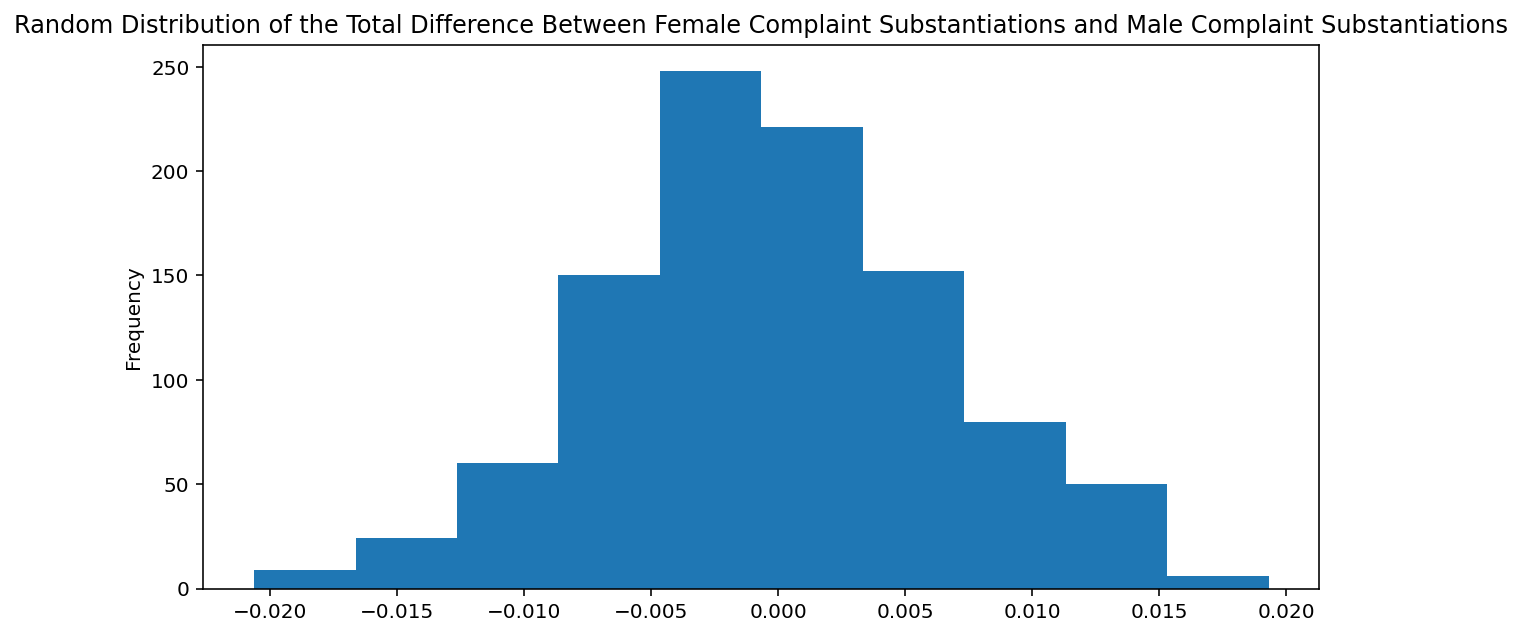

In [15]:
# fix a significance level of 0.01
significance = 0.01
# set simulation count to 1,000
n = 1_000
# create a pivot table for the observed data by complaint gender and whether or not
# the complaint was substantiated along with specified allegation
pivot = pivot_gender(data)
# find the observed test statistic
observation = difference_gender(pivot)
# create an array of length 1,000 to record simulation test statistics in
statistics = np.zeros(n)
# run 1,000 simulations
for i in range(n):
    # copy the data
    simulation = data.copy()
    # shuffle the complainant gender column
    simulation["complainant_gender"] = \
        simulation.sample(frac = 1, random_state = i).reset_index()["complainant_gender"]
    # pivot the simulation data
    simulation_pivot = pivot_gender(simulation)
    # find the simulation test statistic
    statistic = difference_gender(simulation_pivot)
    # record the test statistic in the array
    statistics[i] = statistic
# convert the array to a series
results = pd.Series(statistics)
# find the p-value of the test
p_value = (results >= observation).mean()
# create a boolean to record whether or not to reject the null hypothesis
reject_null = (p_value < significance)
# set a title for the graph
title = "Random Distribution of the Total Difference Between Female Complaint " + \
    "Substantiations and Male Complaint Substantiations"
# plot the random distribution of the total difference between female complaint
# substantiations and male complaint substantiations
results.plot(kind = "hist", title = title, figsize = (10, 5))
# print the results
print("observed value: " + str(observation))
print("p-value: " + str(p_value))
print("reject null hypothesis: " + str(reject_null))

### Officer Ethnicity Prediction

#### Baseline Model

This section creates a new dataframe upon which predictions will be made. Some features were dropped due to their subjective irrelevance to officer ethnicity and also to avoid IDs so that the model does not match each target with their respective IDs.

In [16]:
pred_data = data.copy()

# specify certain columns to drop
to_drop = [
    "unique_mos_id",
    "complaint_id",
    "board_disposition",
    "rank_now",
    "rank_incident",
    "outcome_description"
]
# drop these columns from the data
pred_data = pred_data.drop(to_drop, axis = 1)
# preview the dataframe
pred_data.head()

,first_name,last_name,command_now,shield_no,month_received,year_received,month_closed,year_closed,command_at_incident,rank_abbrev_incident,...,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,substantiated
0,Jonathan,Ruiz,078 PCT,8409,7,2019,5,2020,078 PCT,POM,...,M,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,True
1,John,Sears,078 PCT,5952,11,2011,8,2012,PBBS,POM,...,M,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,True
2,John,Sears,078 PCT,5952,11,2011,8,2012,PBBS,POM,...,M,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,True
3,John,Sears,078 PCT,5952,7,2012,9,2013,PBBS,POM,...,M,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,True
4,Noemi,Sierra,078 PCT,24058,8,2018,2,2019,078 PCT,POF,...,F,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,True


This section splits the data into features and target, categorizing each feature as a categorical, binary (technically categorical), or quantitative variable.

In [17]:
# enumerate the target feature
target = "mos_ethnicity"
# the predictor features are the rest of the features
predictors = pred_data.drop(target, axis = 1).columns.tolist()

# split the data into predictors and target features
X = pred_data[predictors]
y = pred_data[target]

# create empty lists to categorize features for separate processing
categoricals = []
booleans = []
quantitatives = []

# iterate through each feature
for column in X.columns:
    # if the column data is str
    if X[column].dtype == 'O':
        # categorize the feature as categorical
        categoricals.append(column)
    # if the column data is boolean
    elif X[column].dtype == "bool":
        # categorize the feature as categorical (binary)
        booleans.append(column)
    # else the column data type must be int or float
    else:
        # categorize the feature as quantitative
        quantitatives.append(column)

# verify that all predictor features have been categorized
len(categoricals) + len(booleans) + len(quantitatives) == len(X.columns)

True

This section makes use of Sci-Kit Learn's machine learning modules to create a pipeline through which input data can be fed for feature engineering followed by decision tree classification.

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

def impute_quant(X):
    """
    Function which fills in -100 for NaNs.
    
    Parameters
    ----------
    X : Pandas DataFrame
        data frame with quantitative features to impute missing values for
        
        
    Returns
    -------
    Pandas DataFrame
        data frame with all missing entries replaced with -100
        
    """
    return X.fillna(-100)

# create a one hot encoder for categorical features
ohe = OneHotEncoder(handle_unknown = "ignore")
# create a function transformer that keeps a feature column as is
keep = FunctionTransformer(lambda x:x)
# create a function transformer to impute missing values for quantitative features
fill_nans = FunctionTransformer(impute_quant)
# create a standard scaler for quantitative features
std_scaler = StandardScaler()

# create a separate pipeline to process quantitative features
quant_pipeline = Pipeline([
    ("impute missing values", fill_nans),
    ("standard scaling", std_scaler)
])

# column transformer to perform different feature engineering procedures on different features
ct = ColumnTransformer([
    ("one hot encoding", ohe, categoricals),
    ("keep boolean features as is", keep, booleans),
    ("quantitative feature processing", quant_pipeline, quantitatives)
])

# create a decision tree classifier with seed 0 for reproducibility
classifier = DecisionTreeClassifier(random_state = 0)

# create the pipeline for the model
pipeline = Pipeline([
    ("preprocessing", ct),
    ("classification", classifier)
])

In [19]:
# split the data into training and test sets with seed 0 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [20]:
# fit the pipeline to the training set
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one hot encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['first_name', 'last_name',
                                                   'command_now',
                                                   'command_at_incident',
                                                   'rank_abbrev_incident',
                                                   'rank_abbrev_now',
                                                   'mos_gender',
                                                   'complainant_ethnicity',
                                                   'complainant_gender',
                                                   'fado_type', 'allegation',
                                                   'contact_reason']),
                                                 ('keep boolean features as...
                                                  Pipeline(steps=[('impute '
                                                                   'missing '
                                                                   'values',
                                                                   FunctionTransformer(func=<function impute_quant at 0x0000021EE61AF6D0>)),
                                                                  ('standard '
                                                                   'scaling',
                                                                   StandardScaler())]),
                                                  ['shield_no',
                                                   'month_received',
                                                   'year_received',
                                                   'month_closed',
                                                   'year_closed',
                                                   'mos_age_incident',
                                                   'complainant_age_incident',
                                                   'precinct'])])),
                ('classification', DecisionTreeClassifier(random_state=0))])

In [21]:
# fetch the accuracy score for the training set
pipeline.score(X_train, y_train)

1.0

In [22]:
# fetch the accuracy score for the test set
pipeline.score(X_test, y_test)

0.9647482014388489

#### Final Model

Create a final model with a few new features for (hopefully) better predictivity and set optimal parameters according to a grid search CV test (not shown in the notebook).

In [23]:
# enumerate the target feature
target = "mos_ethnicity"
# the predictor features are the rest of the features
predictors = pred_data.drop(target, axis = 1).columns.tolist()

# split the data into predictors and target features
X = pred_data[predictors]
y = pred_data[target]

# create empty lists to categorize features for separate processing
categoricals = []
booleans = []
ages = []
years = []
quantitatives = []

# iterate through each feature
for column in X.columns:
    # if the column data type is str
    if X[column].dtype == 'O':
        # categorize the feature as categorical
        categoricals.append(column)
    # if the column data is boolean
    elif X[column].dtype == "bool":
        # categorize the feature as categorical (binary)
        booleans.append(column)
    # if "age" is in the feature name
    elif "age" in column:
        # sort the feature into a separate list for age features
        ages.append(column)
    # if "year" is in the feature name
    elif "year" in column:
        # sort the feature into a separate list for year features
        years.append(column)
    # else the column data type must be int or float
    else:
        # categorize the feature as quantitative
        quantitatives.append(column)

# verify that all predictor features have been categorized
len(categoricals) + len(booleans) + len(ages) + len(years) + len(quantitatives) == len(X.columns)

True

In [24]:
from sklearn.preprocessing import Binarizer

def age_to_cat(X):
    """
    Function to turn quantitative age features into categorical features categorized
    by "Young", "Old", and missing.
    
    Parameters
    ----------
    X : Pandas DataFrame
        data frame with quantitative age features to binarily convert into "Young" and
        "Old" with
        
        
    Returns
    -------
    X : Pandas DataFrame
        modified data frame with age values encoded as "Young" or "Old"
        
    """
    # replace "Young" ages with 0
    X = X.mask(X < 40, 0)
    # replace "Old" ages with 1
    X = X.mask(X >= 40, 1)
    # replace the binary encodings with string representation
    X = X.replace({0: "Young", 1: "Old"})
    # return the modified data frame
    return X

# set a threshold for a binarizer
year_threshold = 1993
# create a binarizer with the year threshold
binarize_year = Binarizer(threshold = year_threshold)
# create a function transformer to turn age features into binary categories
categorizer = FunctionTransformer(age_to_cat)

# create a separate pipeline to process age features
age_pipeline = Pipeline([
    ("categorize", categorizer),
    ("one hot encoding", ohe)
])

# column transformer to perform different feature engineering procedures on different features
ct = ColumnTransformer([
    ("one hot encoding", ohe, categoricals),
    ("keep boolean features as is", keep, booleans),
    ("age preprocessing", age_pipeline, ages),
    ("binarizing", binarize_year, years),
    ("quantitative feature processing", quant_pipeline, quantitatives)
])

# create a decision tree classifier with the optimal parameters from a grid search CV test and with seed 0 for reproducibility
classifier = DecisionTreeClassifier(
    max_depth = None, 
    min_samples_leaf = 2, 
    min_samples_split = 5,
    random_state = 0
)

# create a pipeline for the model
pipeline = Pipeline([
    ("preprocessing", ct),
    ("classification", classifier)
])

In [25]:
# fit the pipeline to the training set
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one hot encoding',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['first_name', 'last_name',
                                                   'command_now',
                                                   'command_at_incident',
                                                   'rank_abbrev_incident',
                                                   'rank_abbrev_now',
                                                   'mos_gender',
                                                   'complainant_ethnicity',
                                                   'complainant_gender',
                                                   'fado_type', 'allegation',
                                                   'contact_reason']),
                                                 ('keep boolean features as...
                                                   'year_closed']),
                                                 ('quantitative feature '
                                                  'processing',
                                                  Pipeline(steps=[('impute '
                                                                   'missing '
                                                                   'values',
                                                                   FunctionTransformer(func=<function impute_quant at 0x0000021EE61AF6D0>)),
                                                                  ('standard '
                                                                   'scaling',
                                                                   StandardScaler())]),
                                                  ['shield_no',
                                                   'month_received',
                                                   'month_closed',
                                                   'precinct'])])),
                ('classification',
                 DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5,
                                        random_state=0))])

In [26]:
# fetch the accuracy score for the training set
pipeline.score(X_train, y_train)

0.9862499000719482

In [27]:
# fetch the accuracy score for the test set
pipeline.score(X_test, y_test)

0.9471223021582734

#### Fairness Evaluation

In [28]:
# create a copy of the training set predictors to investigate
results = X_test.copy()
# add a column determining whether or not the complainant is White
results["complainant_White"] = (results["complainant_ethnicity"] == "White")
# select only the new column
results = results[["complainant_White"]]
# fetch the predictions for the test set
predictions = pipeline.predict(X_test)
# add the predictions as a column
results["prediction"] = predictions
# add the true values as a column
results["tag"] = y_test
# add a column determining whether or not the prediction was correct
results["correct"] = (results["prediction"] == results["tag"])
# preview the data
results.head()

,complainant_White,prediction,tag,correct
21484,False,White,White,True
6161,False,White,White,True
21216,False,White,White,True
10872,False,Hispanic,Hispanic,True
30012,False,White,White,True


In [29]:
def pivot_results(results):
    """
    Function to create a pivot table representing the conditional distribution of
    prediction accuracy dependent on whether or not a complainant is White.
    
    Parameters
    ----------
    results : Pandas DataFrame
        data frame with a column for whether or not the complainant is White and another
        for if the prediction was correct
        
    Returns
    -------
    pivot : Pandas DataFrame
        pivot table with whether or not the complainant is White as the indices and the
        accuracy as the columns; values are accuracy scores in proportions
    """
    # pivot the data
    pivot = results.pivot_table(index = "complainant_White", columns = "correct", aggfunc = "size")
    # convert each row to proportions
    pivot = pivot.transpose().apply(lambda x:x/x.sum()).transpose()
    # return the pivot table
    return pivot

def find_diff(pivot):
    """
    Function to find the difference between the accuracy scores for White complainants
    and non-White complainants.
    
    Parameters
    ----------
    pivot : Pandas DataFrame
        pivot table of accuracy dependent on whether or not the complainant is White
        
    
    Returns
    -------
    diff : float
        accuracy score for White complainants subtracted by accuracy for non-White
        complainants
        
    """
    # fetch the column representing accuracy
    correct = pivot[True]
    # fetch the accuracy for White complainants
    White = correct[True]
    # fetch the accuracy for non-White complainants
    not_White = correct[False]
    # compute the difference
    diff = White - not_White
    # return the difference
    return diff

def randomize_results(results, seed):
    """
    Function to shuffle the column for whether or not the complainant is White.
    
    Parameters
    ----------
    results : Pandas DataFrame
        data frame with a "complainant_White" column to randomly shuffle
    seed : int
        seed to obtain a particular random outcome when randomizing results
    
    Returns
    -------
    simulation : Pandas DataFrame
        data frame with a shuffled "complainant_White" column
    """
    # create a copy of the input data frame so as not to modify it
    simulation = results.copy()
    # reset the index of the copy so that the new values match up perfectly
    simulation = simulation.reset_index()
    # randomly shuffle the "complainant_White" column
    simulation["complainant_White"] = simulation.sample(frac = 1, random_state = seed).reset_index()["complainant_White"]
    # return the data frame with shuffled "complainant_White" column
    return simulation

def simulate_null(results, seed = None):
    """
    Function to simulate the null hypothesis and compute the test statistic for the
    random simulation.
    
    Parameters
    ----------
    results : Pandas DataFrame
        data frame with a "complainant_White" column and a "correct" column
    seed : int
        seed to obtain a particular random outcome when randomizing results
        
        
    Returns
    -------
    statistic : float
        accuracy score for White complainants subtracted by accuracy for non-White complainants
    """
    # shuffle the "complainant_White" column
    simulation = randomize_results(results, seed)
    # create a pivot table of proportions with the random data
    simulation_pivot = pivot_results(simulation)
    # compute the difference
    statistic = find_diff(simulation_pivot)
    # return the test statistic
    return statistic

In [30]:
# create a pivot table of proportions with the observed data
results_pivot = pivot_results(results)
# view the pivot table
results_pivot

correct,False,True
complainant_White,,
False,0.051550,0.948450
True,0.067432,0.932568


In [31]:
# find the difference in prediction accuracy between White and non-White complainants
observation = find_diff(results_pivot)
# view the observed value
observation

-0.015881412479531787

significance level: 0.01
number of simulations: 1000
observed value: -0.015881412479531787
p-value: 0.972
reject null hypothesis?: False


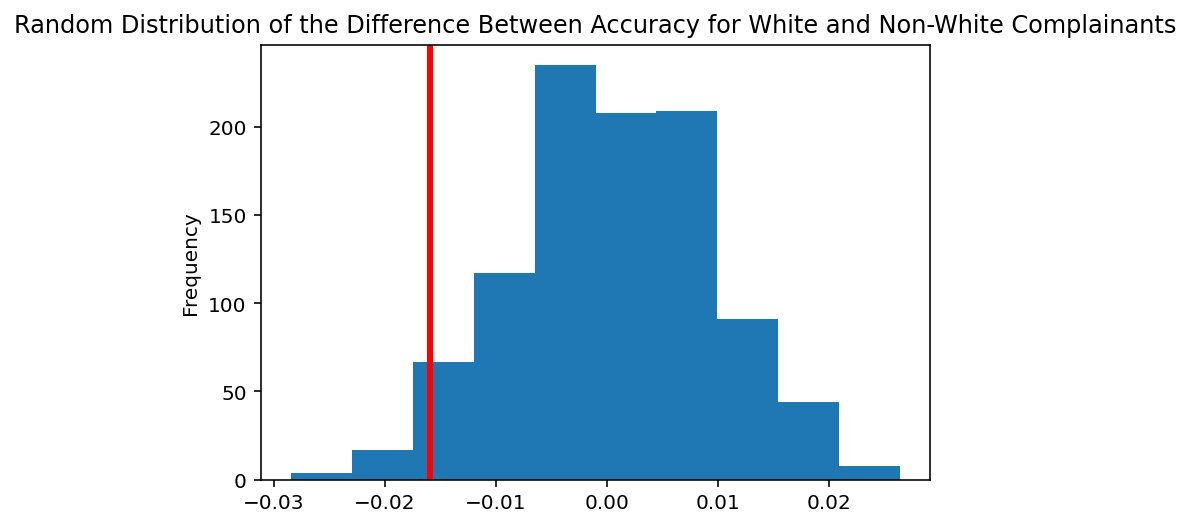

In [32]:
# fix a significance level of 0.01
significance = 0.01
# declare the number of simulations to run
num_simulations = 1_000
# create an empty list to store test statistics in
statistics = []
# run the random simulations
for i in range(num_simulations):
    # obtain the random test statistic by simulating the null hypothesis
    statistic = simulate_null(results, i)
    # add the result to the list
    statistics.append(statistic)
# convert the list to a series for easy boolean masking
series = pd.Series(statistics)

# plot a histogram of the random distribution of test statistics
series.plot(
    kind = "hist",
    title = "Random Distribution of the Difference Between Accuracy" +
     " for White and Non-White Complainants",
    xlabel = "Difference"
)
# plot a vertical line marking where the observed value falls in the distribution
plt.axvline(x = observation, lw = 3, color = 'r')

# find the p-value of the permutation test
p_value = (series >= observation).mean()
# create a boolean variable for if the p-value is less than the significance
reject_null = p_value < significance

# print the output
print("significance level: " + str(significance))
print("number of simulations: " + str(num_simulations))
print("observed value: " + str(observation))
print("p-value: " + str(p_value))
print("reject null hypothesis?: " + str(reject_null))